In [1]:
import argparse
from pathlib import Path
from pointcept.supplemental.mesh_processing import DataHandler, set_data_root, MeshAnalyser

set_data_root("../data")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dh = DataHandler("park_row")
dh.ensure_meshes()

23:05:15 - INFO - Label park_row already has extracted meshes.


In [3]:
analyser = MeshAnalyser(data_handler=dh)

In [4]:
to_exclude = ['1_WALL', '2_FLOOR', '3_ROOF', '4_CEILING']
pcds = analyser.generate_toy_pcds(resolution=0.1, excluded_categories=to_exclude)

23:05:17 - INFO - Generating toy pointclouds for categories ['1_WALL', '2_FLOOR', '3_ROOF', '4_CEILING', '5_FOOTPATH', '6_GRASS', '7_COLUMN', '8_DOOR', '9_WINDOW', '10_STAIR', '11_RAILING', '12_RWP', '13_OTHER'].
23:05:17 - INFO - Sampling with resolution 0.1.
23:05:17 - WARNING - Category '1_WALL' not found in meshes.
23:05:17 - WARNING - Category '2_FLOOR' not found in meshes.
23:05:17 - WARNING - Category '3_ROOF' not found in meshes.
23:05:17 - WARNING - Category '4_CEILING' not found in meshes.
23:05:17 - INFO - Number of points after initial sampling: 1357835
23:05:18 - INFO - Number of points after Poisson Disk Sampling: 237207
23:05:18 - INFO - Number of points after initial sampling: 299758
23:05:18 - INFO - Number of points after Poisson Disk Sampling: 57770
23:05:18 - INFO - Number of points after initial sampling: 879330
23:05:18 - INFO - Number of points after Poisson Disk Sampling: 85279
23:05:18 - INFO - Number of points after initial sampling: 880435
23:05:18 - INFO - N

In [5]:
pcds

{'5_FOOTPATH': array([[ -9.489002 ,  28.647999 , -14.044471 ],
        [-14.570002 ,  42.904    , -13.464467 ],
        [-11.009    ,  28.655    , -14.044471 ],
        ...,
        [  3.8450773,   2.763097 , -15.581927 ],
        [  3.7533932,   2.763097 , -15.608191 ],
        [  3.6617088,   2.763097 , -15.634454 ]], dtype=float32),
 '6_GRASS': array([[ -3.4500012,  -0.9680002, -15.647474 ],
        [ -4.263002 ,  -0.9680002, -15.526474 ],
        [ -4.545001 ,  -1.1970041, -15.484475 ],
        ...,
        [ -7.6023617,  53.740444 , -13.425464 ],
        [ -7.690067 ,  53.78836  , -13.426693 ],
        [ -7.814915 ,  53.754383 , -13.428158 ]], dtype=float32),
 '7_COLUMN': array([[  2.3749993, -49.021    , -12.2784815],
        [  2.4349995, -49.039005 ,  -8.948482 ],
        [  2.445    , -49.016    , -11.520482 ],
        ...,
        [  7.1282854,  20.686855 ,  -8.464329 ],
        [  7.300571 ,  20.685713 ,  -8.498614 ],
        [  7.3606997,  20.4441   ,  -8.646971 ]], dtype=f

In [6]:
binning = analyser.evaluate_binning(pcds, x_cell_width=6.0, y_cell_width=6.0)
binning

23:05:20 - INFO - Binning is using 5 bins in X and 19 bins in Y based on cell widths of 6.0 and 6.0.


{'counts': {'5_FOOTPATH': array([[6136., 7207., 7266., 6779., 4037., 3993., 5608., 3871., 3786.,
          3801., 3704., 3649., 3680., 5193., 5424., 5673., 5012., 4508.,
          3765.],
         [5769., 2589., 5050., 5714.,    0.,    0., 1084.,    0.,    0.,
             0.,    0.,    0.,    0.,    0.,    0.,    0.,  504., 4093.,
           967.],
         [5993.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
             0.,    0.,    0.,    0.,    0.,    0.,    0., 1838., 6921.,
          3446.],
         [6214.,  178.,   72.,    0.,    0.,    0.,    0.,    0.,    0.,
           452.,  778., 2959., 2758., 3115.,    0.,    0.,  783., 4301.,
          1511.],
         [4957., 4556., 4405., 4074., 4255., 4387., 4577., 4761., 4915.,
          5468., 5923., 3288., 4206., 6843., 3141., 2833., 2250., 2187.,
             0.]]),
  '6_GRASS': array([[   0.,    0.,    0.,  155., 1040., 1041.,  521., 1299., 1423.,
          1415., 1338., 1232.,  820.,    0.,  564.,  604.,  974.,  934


Iteration 1
New best equality score: 83502.3458
Category counts per area:

Area 1:
  Area size: 28 cells (29.47% of total, intended 70.00%)
  5_FOOTPATH: 52448 points (22.11% of total 5_FOOTPATH)
  6_GRASS: 21479 points (37.18% of total 6_GRASS)
  7_COLUMN: 13258 points (15.55% of total 7_COLUMN)
  8_DOOR: 12933 points (37.41% of total 8_DOOR)
  9_WINDOW: 15737 points (35.01% of total 9_WINDOW)
  10_STAIR: 5959 points (28.23% of total 10_STAIR)
  11_RAILING: 2520 points (18.73% of total 11_RAILING)
  12_RWP: 568 points (36.16% of total 12_RWP)
  13_OTHER: 8440 points (53.23% of total 13_OTHER)
  Total points in area: 133342

Area 2:
  Area size: 43 cells (45.26% of total, intended 10.00%)
  5_FOOTPATH: 103763 points (43.74% of total 5_FOOTPATH)
  6_GRASS: 27354 points (47.35% of total 6_GRASS)
  7_COLUMN: 43268 points (50.74% of total 7_COLUMN)
  8_DOOR: 14913 points (43.13% of total 8_DOOR)
  9_WINDOW: 15344 points (34.14% of total 9_WINDOW)
  10_STAIR: 10042 points (47.57% of total 

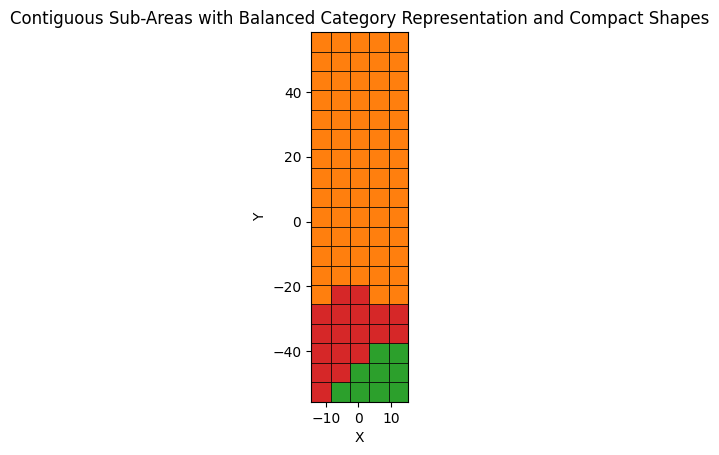

In [7]:
import numpy as np
import random
import heapq
import matplotlib.pyplot as plt

# Assume counts, x_edges, y_edges are given from your data
counts = binning['counts']
x_edges = binning['x_edges']
y_edges = binning['y_edges']

# Extract categories
categories = list(counts.keys())
num_categories = len(categories)

# Map category names to indices
category_to_index = {cat: idx for idx, cat in enumerate(categories)}

# Compute total counts per category
total_category_counts = {cat: np.sum(counts[cat]) for cat in categories}

# Get grid size from counts arrays
grid_size_x, grid_size_y = counts[categories[0]].shape  # Swap the order

# Create category_counts_grid of shape (grid_size_y, grid_size_x, num_categories)
category_counts_grid = np.zeros((grid_size_y, grid_size_x, num_categories))

# Populate category_counts_grid
for cat in categories:
    idx = category_to_index[cat]
    category_counts_grid[:, :, idx] = counts[cat].T  # Transpose to match dimensions

# Parameters
weights = [0.7, 0.1, 0.2]  # Intended area weights: training, evaluation, test
num_areas = len(weights)
iterations = 100  # Number of iterations to run
verbose = True  # Whether to print detailed statistics
min_percentage_threshold = 5  # Minimum acceptable percentage per category per area

# Total number of grid cells
total_cells = grid_size_x * grid_size_y

# Desired counts per area
desired_category_counts_list = []
for area_id in range(1, num_areas + 1):
    area_weight = weights[area_id - 1]
    desired_category_counts = {cat: area_weight * total_category_counts[cat] for cat in categories}
    # For last area, adjust desired counts to ensure total counts are correct
    if area_id == num_areas:
        for cat in categories:
            desired_category_counts[cat] = total_category_counts[cat] - sum(
                desired_category_counts_list[i][cat] for i in range(area_id - 1)
            )
    desired_category_counts_list.append(desired_category_counts)

# Intended number of cells per area based on weights
intended_area_sizes = [weight * total_cells for weight in weights]

# Function to get the neighbors of a cell
def get_neighbors(i, j, grid_size_y, grid_size_x):
    neighbors = []
    if i > 0:
        neighbors.append((i - 1, j))
    if i < grid_size_y - 1:
        neighbors.append((i + 1, j))
    if j > 0:
        neighbors.append((i, j - 1))
    if j < grid_size_x - 1:
        neighbors.append((i, j + 1))
    return neighbors

# Adjusted priority function
def compute_priority(cell, area_category_counts, desired_category_counts, area_size, intended_area_size, area_bounding_box):
    i, j = cell
    cell_counts = category_counts_grid[i, j, :]
    priority = 0
    # Compute area size deficit
    area_size_deficit = intended_area_size - area_size
    for idx, cat in enumerate(categories):
        total_cat_count = total_category_counts[cat]
        area_count = area_category_counts[cat]
        desired_count = desired_category_counts[cat]
        cell_count = cell_counts[idx]
        remaining = desired_count - area_count
        if remaining > 0 and cell_count > 0:
            # Compute the deficit percentage
            area_percentage = (area_count / total_cat_count) * 100 if total_cat_count > 0 else 0
            deficit = min_percentage_threshold - area_percentage
            if deficit > 0:
                # Increase priority if the category is underrepresented
                priority += cell_count * (deficit ** 2)  # Square to emphasize underrepresentation
            else:
                priority += cell_count
    # Adjust priority based on area size
    if area_size_deficit <= 0:
        # Area has reached or exceeded intended size; reduce priority
        priority -= abs(area_size_deficit) * 1000  # Penalize exceeding size
    # Compute new bounding box if the cell is added
    min_i = min(area_bounding_box['min_i'], i)
    max_i = max(area_bounding_box['max_i'], i)
    min_j = min(area_bounding_box['min_j'], j)
    max_j = max(area_bounding_box['max_j'], j)
    width = max_j - min_j + 1
    height = max_i - min_i + 1
    # Compute aspect ratio before and after adding the cell
    old_width = area_bounding_box['max_j'] - area_bounding_box['min_j'] + 1
    old_height = area_bounding_box['max_i'] - area_bounding_box['min_i'] + 1
    old_aspect_ratio = max(old_width / old_height, old_height / old_width)
    new_aspect_ratio = max(width / height, height / width)
    # Penalize if aspect ratio worsens
    if new_aspect_ratio > old_aspect_ratio:
        aspect_ratio_increase = new_aspect_ratio - old_aspect_ratio
        priority -= aspect_ratio_increase * 1000  # Adjust multiplier as needed
    # Negative priority because heapq is a min-heap and we want higher priority to be popped first
    return -priority

# Function to assign any remaining unallocated cells
def assign_unallocated_cells(grid, grid_size_y, grid_size_x, num_areas):
    unallocated_cells = np.argwhere(grid == 0)
    for cell in unallocated_cells:
        i, j = cell
        # Find neighboring cells that are allocated
        neighbors = get_neighbors(i, j, grid_size_y, grid_size_x)
        neighbor_areas = [grid[n] for n in neighbors if grid[n] > 0]
        if neighbor_areas:
            # Assign to the area with the most neighboring cells
            area_id = max(set(neighbor_areas), key=neighbor_areas.count)
            grid[i, j] = area_id
        else:
            # Assign to a random area
            grid[i, j] = random.randint(1, num_areas)

# Adjusted function to compute equality score with area size and shape penalty
def compute_equality_score(area_category_counts, total_category_counts, min_percentage_threshold, area_sizes, intended_area_sizes, area_bounding_boxes):
    category_scores = []
    penalty = 0
    for cat in categories:
        total_cat_count = total_category_counts[cat]
        if total_cat_count > 0:
            percentages = [
                (area_category_counts[area_id][cat] / total_cat_count) * 100
                for area_id in area_category_counts
            ]
            # Check for underrepresented categories
            for p in percentages:
                if p < min_percentage_threshold:
                    # Exponential penalty for underrepresentation
                    deficit = min_percentage_threshold - p
                    penalty += np.exp(deficit)
                    if p == 0:
                        penalty += 1e6  # Large penalty if category is missing
            variance = np.var(percentages)
            category_scores.append(variance)
    # Penalty for deviation from intended area sizes
    for area_size, intended_size in zip(area_sizes, intended_area_sizes):
        size_diff = abs(area_size - intended_size)
        size_penalty = (size_diff / total_cells) * 1e5  # Adjust the multiplier as needed
        penalty += size_penalty
    # Penalty for aspect ratios
    for area_bb in area_bounding_boxes:
        width = area_bb['max_j'] - area_bb['min_j'] + 1
        height = area_bb['max_i'] - area_bb['min_i'] + 1
        if width > 0 and height > 0:
            aspect_ratio = max(width / height, height / width)
            aspect_ratio_penalty = (aspect_ratio - 1) ** 2 * 1000  # Adjust multiplier as needed
            penalty += aspect_ratio_penalty
        else:
            penalty += 1e6  # Large penalty if width or height is zero (shouldn't happen)
    # The overall equality score is the mean variance across all categories plus penalties
    equality_score = np.mean(category_scores) + penalty
    return equality_score

# Initialize variables to keep track of the best assignment
best_equality_score = float('inf')
best_grid = None
best_area_category_counts = None
best_area_sizes = None

# Iterative algorithm
for iteration in range(1, iterations + 1):
    if verbose:
        print(f"\nIteration {iteration}")

    # Initialize grid
    grid = np.zeros((grid_size_y, grid_size_x), dtype=int)

    # Randomly select seed cells for each area
    seed_cells = []
    used_cells = set()
    for area_id in range(1, num_areas + 1):
        while True:
            i = random.randint(0, grid_size_y - 1)
            j = random.randint(0, grid_size_x - 1)
            if (i, j) not in used_cells:
                seed_cells.append((i, j))
                used_cells.add((i, j))
                break

    # Initialize area data
    area_category_counts_list = []
    area_sizes = []
    area_bounding_boxes = []
    for area_id, seed in zip(range(1, num_areas + 1), seed_cells):
        area_category_counts_list.append({cat: 0 for cat in categories})
        area_sizes.append(0)
        area_bounding_boxes.append({'min_i': seed[0], 'max_i': seed[0], 'min_j': seed[1], 'max_j': seed[1]})
    assigned_cells = set()
    queued_cells = set()

    # Initialize combined priority queue
    heap = []

    # Add seed cells to the heap
    for area_id, seed in zip(range(1, num_areas + 1), seed_cells):
        if grid[seed] == 0:
            grid[seed] = area_id
            assigned_cells.add(seed)
            area_sizes[area_id - 1] += 1
            cell_counts = category_counts_grid[seed[0], seed[1], :]
            for idx, cat in enumerate(categories):
                area_category_counts_list[area_id - 1][cat] += cell_counts[idx]
            neighbors = get_neighbors(seed[0], seed[1], grid_size_y, grid_size_x)
            for n in neighbors:
                if grid[n] == 0 and n not in queued_cells:
                    priority = compute_priority(
                        n,
                        area_category_counts_list[area_id - 1],
                        desired_category_counts_list[area_id - 1],
                        area_sizes[area_id - 1],
                        intended_area_sizes[area_id - 1],
                        area_bounding_boxes[area_id - 1]
                    )
                    heapq.heappush(heap, (priority, n, area_id))
                    queued_cells.add(n)

    # Grow areas simultaneously
    while heap:
        _, current_cell, area_id = heapq.heappop(heap)
        if grid[current_cell] != 0:
            continue  # Skip if already assigned
        grid[current_cell] = area_id
        assigned_cells.add(current_cell)
        area_sizes[area_id - 1] += 1
        cell_counts = category_counts_grid[current_cell[0], current_cell[1], :]
        for idx, cat in enumerate(categories):
            area_category_counts_list[area_id - 1][cat] += cell_counts[idx]
        # Update area bounding box
        area_bb = area_bounding_boxes[area_id - 1]
        area_bb['min_i'] = min(area_bb['min_i'], current_cell[0])
        area_bb['max_i'] = max(area_bb['max_i'], current_cell[0])
        area_bb['min_j'] = min(area_bb['min_j'], current_cell[1])
        area_bb['max_j'] = max(area_bb['max_j'], current_cell[1])
        # Add neighbors to the heap
        neighbors = get_neighbors(current_cell[0], current_cell[1], grid_size_y, grid_size_x)
        for n in neighbors:
            if grid[n] == 0 and n not in queued_cells:
                priority = compute_priority(
                    n,
                    area_category_counts_list[area_id - 1],
                    desired_category_counts_list[area_id - 1],
                    area_sizes[area_id - 1],
                    intended_area_sizes[area_id - 1],
                    area_bounding_boxes[area_id - 1]
                )
                heapq.heappush(heap, (priority, n, area_id))
                queued_cells.add(n)

    # Assign any remaining unallocated cells
    assign_unallocated_cells(grid, grid_size_y, grid_size_x, num_areas)

    # Recalculate area_category_counts and area_sizes
    area_category_counts = {area_id: area_category_counts_list[area_id - 1] for area_id in range(1, num_areas + 1)}
    area_sizes = [np.sum(grid == area_id) for area_id in range(1, num_areas + 1)]

    # Compute equality score with area size and shape penalty
    equality_score = compute_equality_score(
        area_category_counts,
        total_category_counts,
        min_percentage_threshold,
        area_sizes,
        intended_area_sizes,
        area_bounding_boxes
    )

    # Update best assignment if current one is better
    if equality_score < best_equality_score:
        best_equality_score = equality_score
        best_grid = grid.copy()
        best_area_category_counts = area_category_counts.copy()
        best_area_sizes = area_sizes.copy()
        best_area_bounding_boxes = [bb.copy() for bb in area_bounding_boxes]
        if verbose:
            print(f"New best equality score: {equality_score:.4f}")

    # Print counts and percentages per area
    if verbose:
        print("Category counts per area:")
        for area_id in range(1, num_areas + 1):
            print(f"\nArea {area_id}:")
            total_area_counts = sum(area_category_counts[area_id][cat] for cat in categories)
            area_size = area_sizes[area_id - 1]
            intended_size = intended_area_sizes[area_id - 1]
            size_percentage = (area_size / total_cells) * 100
            intended_percentage = (intended_size / total_cells) * 100
            print(f"  Area size: {area_size} cells ({size_percentage:.2f}% of total, intended {intended_percentage:.2f}%)")
            for cat in categories:
                count = area_category_counts[area_id][cat]
                total_cat_count = total_category_counts[cat]
                percentage = (count / total_cat_count * 100) if total_cat_count > 0 else 0
                print(f"  {cat}: {int(count)} points ({percentage:.2f}% of total {cat})")
            print(f"  Total points in area: {int(total_area_counts)}")

# After iterations, use the best assignment
grid = best_grid
area_category_counts = best_area_category_counts
area_sizes = best_area_sizes
area_bounding_boxes = best_area_bounding_boxes

print(f"\nBest equality score after {iterations} iterations: {best_equality_score:.4f}")

# Print the final counts and percentages
print("\nFinal category counts per area:")
for area_id in range(1, num_areas + 1):
    print(f"\nArea {area_id}:")
    total_area_counts = sum(area_category_counts[area_id][cat] for cat in categories)
    area_size = area_sizes[area_id - 1]
    intended_size = intended_area_sizes[area_id - 1]
    size_percentage = (area_size / total_cells) * 100
    intended_percentage = (intended_size / total_cells) * 100
    print(f"  Area size: {area_size} cells ({size_percentage:.2f}% of total, intended {intended_percentage:.2f}%)")
    for cat in categories:
        count = area_category_counts[area_id][cat]
        total_cat_count = total_category_counts[cat]
        percentage = (count / total_cat_count * 100) if total_cat_count > 0 else 0
        print(f"  {cat}: {int(count)} points ({percentage:.2f}% of total {cat})")
    print(f"  Total points in area: {int(total_area_counts)}")

# Plotting the grid and the sub-areas
fig, ax = plt.subplots()
ax.set_xlim(x_edges[0], x_edges[-1])
ax.set_ylim(y_edges[0], y_edges[-1])
ax.set_aspect('equal')

cell_widths = x_edges[1:] - x_edges[:-1]  # Length: grid_size_x
cell_heights = y_edges[1:] - y_edges[:-1]  # Length: grid_size_y

# For plotting, we need to know the x and y positions of the grid cells
x_positions = x_edges[:-1]  # Length: grid_size_x
y_positions = y_edges[:-1]  # Length: grid_size_y

for i in range(grid_size_y):      # i from 0 to grid_size_y - 1
    for j in range(grid_size_x):  # j from 0 to grid_size_x - 1
        area_id = grid[i, j]
        if area_id > 0:
            x = x_positions[j]
            y = y_positions[i]
            width = cell_widths[j]
            height = cell_heights[i]
            ax.add_patch(plt.Rectangle((x, y), width, height, facecolor=f'C{area_id}',
                                       edgecolor='black', linewidth=0.5))

plt.title('Contiguous Sub-Areas with Balanced Category Representation and Compact Shapes')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Processing Fold 1
Fold 1 has 3 rectangles.


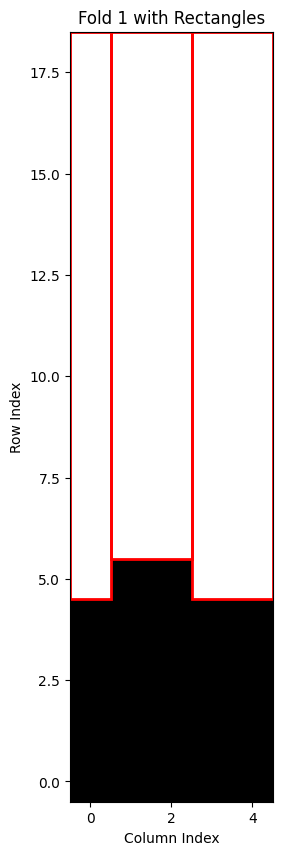

Processing Fold 2
Fold 2 has 3 rectangles.


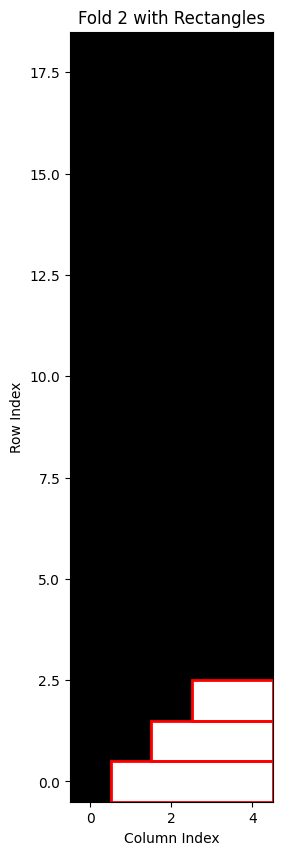

Processing Fold 3
Fold 3 has 4 rectangles.


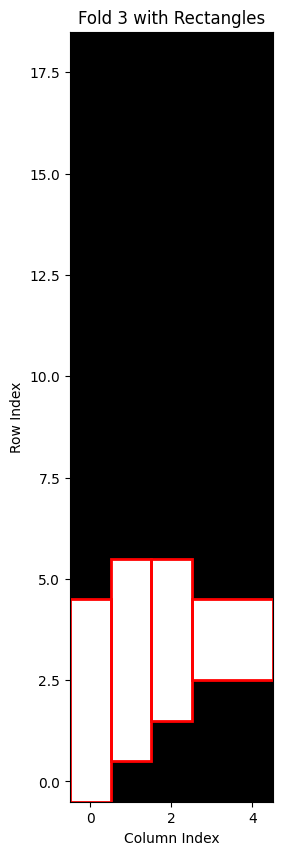


Rectangles for Fold 1:
  Rectangle 1: Rows 5 to 18, Cols 0 to 0
  Rectangle 2: Rows 5 to 18, Cols 3 to 4
  Rectangle 3: Rows 6 to 18, Cols 1 to 2

Rectangles for Fold 2:
  Rectangle 1: Rows 0 to 0, Cols 1 to 4
  Rectangle 2: Rows 1 to 1, Cols 2 to 4
  Rectangle 3: Rows 2 to 2, Cols 3 to 4

Rectangles for Fold 3:
  Rectangle 1: Rows 0 to 4, Cols 0 to 0
  Rectangle 2: Rows 1 to 5, Cols 1 to 1
  Rectangle 3: Rows 2 to 5, Cols 2 to 2
  Rectangle 4: Rows 3 to 4, Cols 3 to 4


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation (you can replace this with your actual data)
# Let's assume best_grid is provided
# For demonstration, we'll create a sample grid similar to the one you provided

# List of fold IDs (areas)
fold_ids = np.unique(best_grid)
fold_ids = fold_ids[fold_ids != 0]  # Exclude 0 if present

def get_fold_binary_grid(grid, fold_id):
    binary_grid = (grid == fold_id).astype(int)
    return binary_grid

def find_rectangles_in_fold(binary_grid):
    rectangles = []
    visited = np.zeros_like(binary_grid, dtype=bool)
    rows, cols = binary_grid.shape

    for i in range(rows):
        j = 0
        while j < cols:
            if binary_grid[i, j] == 1 and not visited[i, j]:
                # Start of a new rectangle
                min_row, min_col = i, j

                # Find the maximum width
                max_col = j
                while max_col < cols and binary_grid[i, max_col] == 1 and not visited[i, max_col]:
                    max_col += 1
                max_col -= 1

                # Find the maximum height
                max_row = i
                expand = True
                while expand and max_row + 1 < rows:
                    for col in range(min_col, max_col + 1):
                        if binary_grid[max_row + 1, col] == 0 or visited[max_row + 1, col]:
                            expand = False
                            break
                    if expand:
                        max_row += 1
                    else:
                        break

                # Mark cells as visited
                for row in range(min_row, max_row + 1):
                    for col in range(min_col, max_col + 1):
                        visited[row, col] = True

                # Add the rectangle to the list
                rectangles.append({
                    'min_row': min_row,
                    'max_row': max_row,
                    'min_col': min_col,
                    'max_col': max_col
                })

                # Move to the next column after the rectangle
                j = max_col + 1
            else:
                j += 1
    return rectangles

def plot_fold_rectangles(binary_grid, rectangles, fold_id):
    rows, cols = binary_grid.shape
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(binary_grid, cmap='gray', origin='upper')

    # Plot rectangles
    for rect in rectangles:
        min_row, max_row = rect['min_row'], rect['max_row']
        min_col, max_col = rect['min_col'], rect['max_col']
        rect_patch = plt.Rectangle(
            (min_col - 0.5, min_row - 0.5),
            max_col - min_col + 1,
            max_row - min_row + 1,
            edgecolor='red',
            facecolor='none',
            linewidth=2
        )
        ax.add_patch(rect_patch)

    ax.set_title(f'Fold {fold_id} with Rectangles')
    ax.set_xlabel('Column Index')
    ax.set_ylabel('Row Index')
    plt.gca().invert_yaxis()  # Optional: invert y-axis to match matrix coordinates
    plt.show()

def process_folds(best_grid):
    fold_rectangles = {}
    for fold_id in fold_ids:
        print(f"Processing Fold {fold_id}")
        binary_grid = get_fold_binary_grid(best_grid, fold_id)
        rectangles = find_rectangles_in_fold(binary_grid)
        fold_rectangles[fold_id] = rectangles
        print(f"Fold {fold_id} has {len(rectangles)} rectangles.")
        plot_fold_rectangles(binary_grid, rectangles, fold_id)
    return fold_rectangles

# Process the folds and get the rectangles
fold_rectangles = process_folds(best_grid)

# Output the rectangles for each fold
for fold_id, rectangles in fold_rectangles.items():
    print(f"\nRectangles for Fold {fold_id}:")
    for idx, rect in enumerate(rectangles):
        print(f"  Rectangle {idx + 1}: Rows {rect['min_row']} to {rect['max_row']}, "
              f"Cols {rect['min_col']} to {rect['max_col']}")

# At this point, fold_rectangles contains the list of rectangles for each fold,
# which can be used to perform the cropping operations on your mesh.
